<a href="https://colab.research.google.com/github/aayushabhatia/Data-Science-and-Business-Intelligence/blob/main/19feb_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19-02-2025 **DSBI Class Assignment**

Aayusha Bhatia    22070122004     CSE-A

Tasks:
1. Data Preprocessing -
Load the dataset using pandas.
Display the first five rows of the dataset.
Check for missing values and handle them appropriately.
Identify and remove duplicate entries if any.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Upload manually in Google Colab)
from google.colab import files
uploaded = files.upload()
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Identify and remove duplicate entries if any
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Display data types
print("\nData types of columns:")
print(df.dtypes)

# Convert data types if necessary
df['Genre'] = df['Genre'].astype('category')
print("\nUpdated data types after conversion:")
print(df.dtypes)

Saving Mall_Customers.csv to Mall_Customers.csv
First five rows of the dataset:
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40

Missing values in the dataset:
CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Number of duplicate rows: 0

Data types of columns:
CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Updated data types after conversion:
CustomerID               int64
Genre                 category
Age                      int64
Annual_Income_(k$)       int64
Spe

2. Univariate Analysis:

Analyze the distribution of numerical features e.g., Age, Income, Purchase Amount using histograms and boxplots, check the proportion of categorical variables e.g., Gender, Customer Segment using bar charts and pie charts.

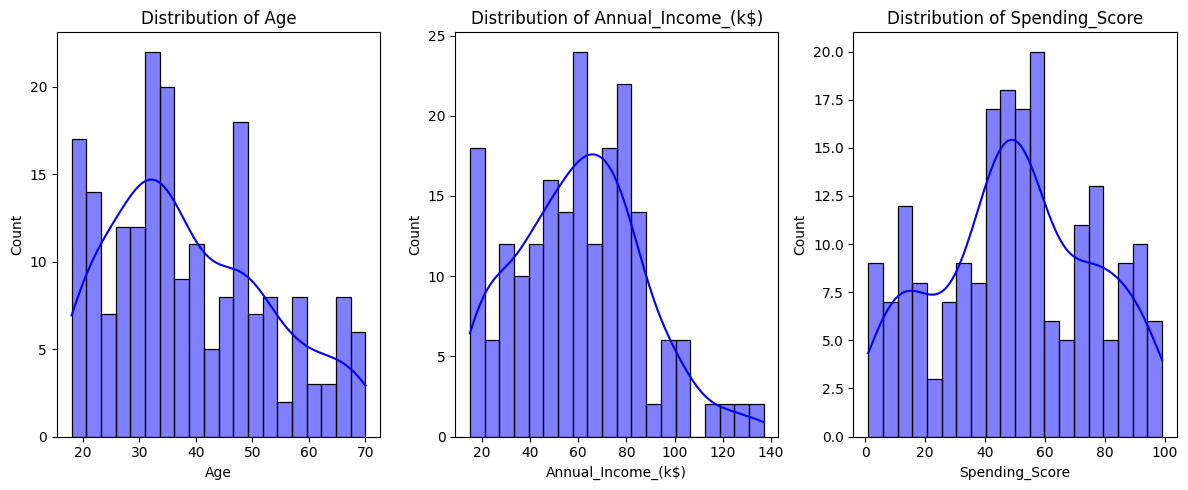

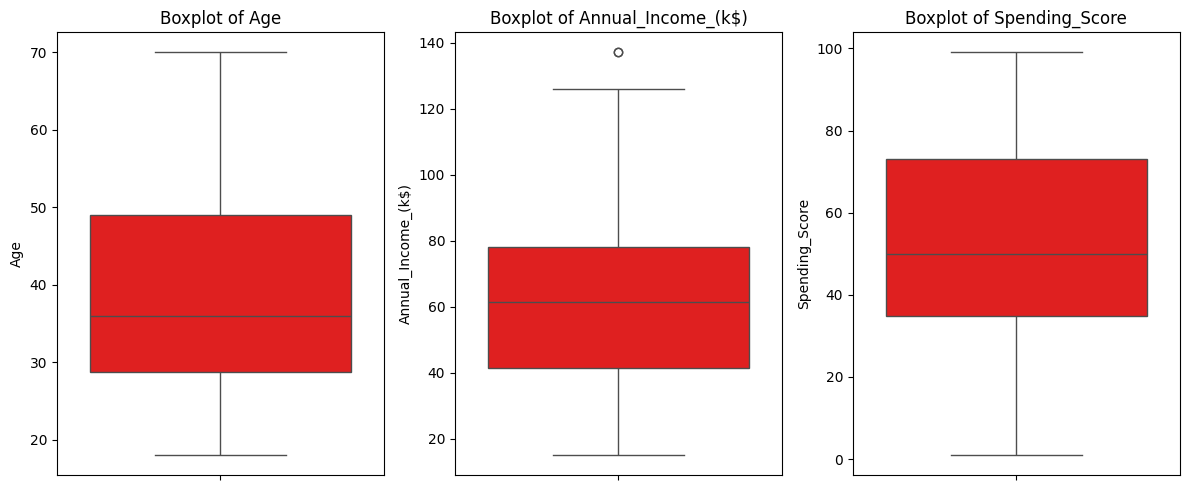

<ipython-input-4-7100bf81fd69>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Genre'], palette='viridis')


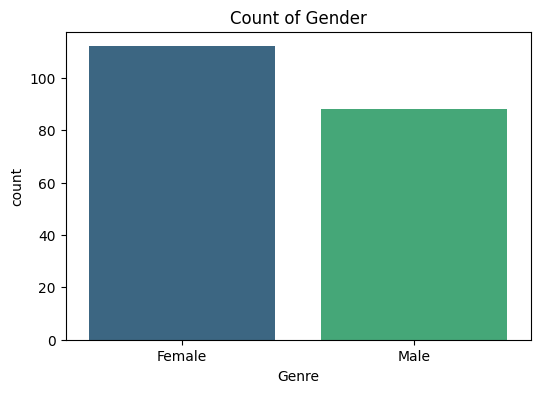

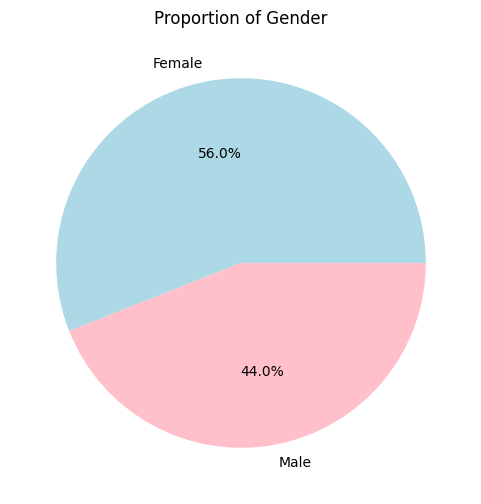

In [4]:
# Histograms for numerical features
numerical_features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='red')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Bar chart for categorical variable 'Genre'
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Genre'], palette='viridis')
plt.title("Count of Gender")
plt.show()

print('\n')

# Pie chart for categorical variable 'Genre'
plt.figure(figsize=(6, 6))
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Proportion of Gender")
plt.ylabel("")
plt.show()

3. 3. Bivariate Analysis
Identify relationships between two variables using scatter plots (e.g., Income vs. Purchase Amount).Compare numerical values across categories using boxplots (e.g., Purchase Amount by Gender). Compute correlation between numerical features and visualize it using a heatmap.


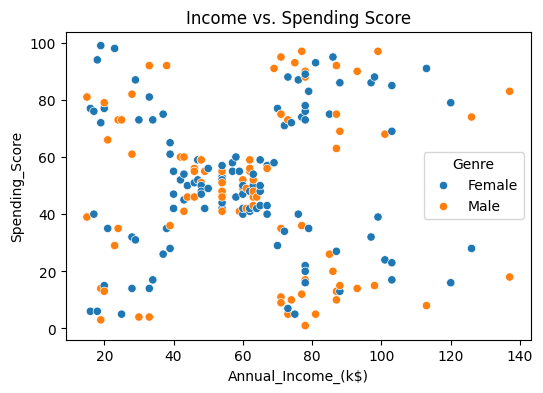

<ipython-input-7-0a49cabf7b30>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Genre'], y=df['Spending_Score'], palette='coolwarm')


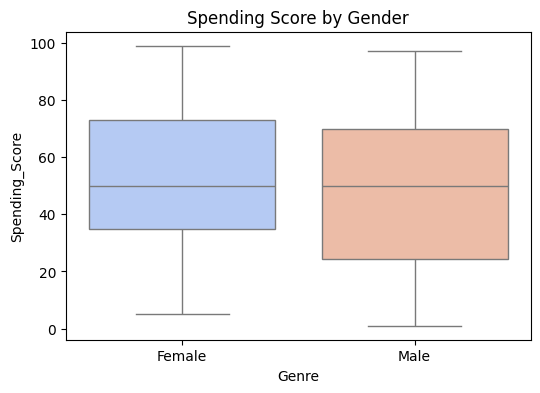

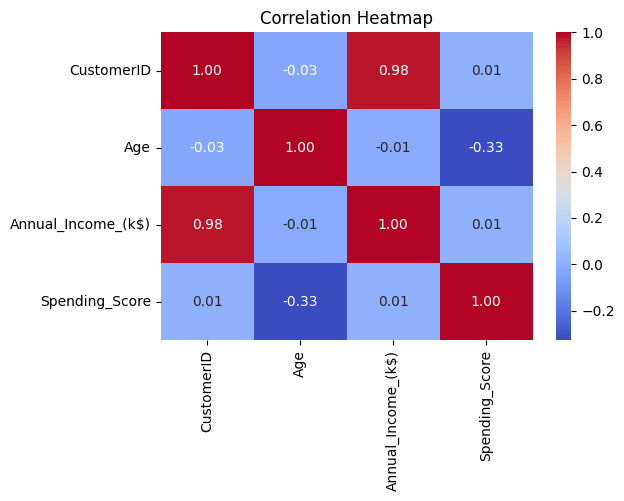

In [7]:
# Exclude categorical variables before computing correlation
corr_matrix = df.select_dtypes(include=['number']).corr()

# Scatter plot: Income vs. Spending Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual_Income_(k$)'], y=df['Spending_Score'], hue=df['Genre'])
plt.title("Income vs. Spending Score")
plt.show()

# Boxplot: Spending Score by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Genre'], y=df['Spending_Score'], palette='coolwarm')
plt.title("Spending Score by Gender")
plt.show()

print('\n')

# Correlation heatmap (excluding non-numeric columns)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()